<a href="https://colab.research.google.com/github/andresum97/text_mining/blob/master/Laboratorio_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Laboratorios Data Science/Laboratorio 4/Data"

en_US.blogs.txt  en_US.news.txt  en_US.twitter.txt


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Universidad del Valle de Guatemala

Integrantes

*   Juan Guillermo Sandoval Lacayo - 17577
*   Alberto Andrés Urizar Mancía - 17632
*   David Uriel Soto Álvarez - 17085






In [9]:
### Se usa pandas para poder hacer lectura y carga de los datos
import pandas as pd
### Se usa numpy para poder manejar los datos en arrays
import numpy as np
### Se usa la libreria Regular Expression operations para poder
### procesar texto con expresiones regulares
import re
### Se va a utilizar esta libreria para eliminar palabras de stop comunes
### en el ingles, y tambien algunas que se encuentren
from nltk.corpus import stopwords
### Libreria para hacer los ngramas
from nltk.util import ngrams
### Libreria para utilizar Tokenize
from nltk import word_tokenize
### Matplot para poder mostrar imagenes
import matplotlib.pyplot as plt
### Para hacer la Nube de Palabras
from wordcloud import WordCloud
### Libreria para usar Reuters
from nltk.corpus import reuters
### Se utiliza la funcion Counter de la libreria collections para
### poder realizar las operaciones de conteo del analisis exploratorio
from collections import Counter, defaultdict
### Vamos a utilizar random para poder uso de sus funciones
import random
### Se emplea para ver las advertencias, en este caso para que las omita al
### momento de  hacer los ngramas
import warnings

# Limpieza de datos

### Lectura de archivos

In [5]:
### Se leen los archivos
fileBlog = open('/content/drive/My Drive/Laboratorios Data Science/Laboratorio 4/Data/en_US.blogs.txt','r')
fblog = fileBlog.readlines()
blogs = [i.lower() for i in fblog] 
fileBlog.close()           

fileNews = open('/content/drive/My Drive/Laboratorios Data Science/Laboratorio 4/Data/en_US.news.txt','r')
fnews = fileNews.readlines()
news = [i.lower() for i in fnews]
fileNews.close()

fileTwitter = open('/content/drive/My Drive/Laboratorios Data Science/Laboratorio 4/Data/en_US.twitter.txt','r')
ftwitter = fileTwitter.readlines()
tweets = [i.lower() for i in ftwitter]
fileTwitter.close()


### Eliminación de URL, caracteres especiales, y emojis

In [6]:
### Se hace la eliminacion de URL
blogs = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in blogs]
blogs = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in blogs]

news = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in news]
news = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in news]

tweets = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in tweets]
tweets = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in tweets]

### Se hace la eliminación de caracteres especiales, numeros y emojis
tweets = [re.sub('[^a-zA-Z0-9 ]+','', i) for i in tweets]
news = [re.sub('[^a-zA-Z0-9 ]+', '', i) for i in news]
blogs = [re.sub('[^a-zA-Z0-9 ]+', '', i) for i in blogs]


### StopWords

In [10]:
#Quitar palabras tendencias
stopwords = set(stopwords.words('english'))
expresiones = ['im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em']
for i in expresiones:
    stopwords.add(i)

separacion_tweets = []
for tweet in tweets:
    word_list = []
    for word in tweet.split():
        if word not in stopwords:
            word_list.append(word)
    separacion_tweets.append(' '.join(word_list))

separacion_blogs = []
for blog in blogs:
    word_listo = []
    for word in blog.split():
        if word not in stopwords:
            word_listo.append(word)
    separacion_blogs.append(' '.join(word_listo))

separacion_news = []
for new in news:
    list_words = []
    for word in new.split():
        if word not in stopwords:
            list_words.append(word)
    separacion_news.append(' '.join(list_words))

# Análisis exploratorio



### Frecuencia de las palabras:

In [11]:
tweet_count = Counter()

for tweet in separacion_tweets:
    tweet_count.update(word.strip('.,?!"\'').lower() for word in tweet.split())

In [12]:
news_count = Counter()

for title in separacion_news:
    news_count.update(word.strip('.,?!"\'').lower() for word in title.split())

In [13]:
blog_count = Counter()
for blog in separacion_blogs:
    blog_count.update(word.strip('.,?!"\'').lower() for word in blog.split())

### Frecuencia de palabras con mayor presencia:


In [28]:
tweet_count.most_common(10)

[('love', 105459),
 ('good', 99641),
 ('dont', 90063),
 ('thanks', 88611),
 ('day', 88571),
 ('one', 81297),
 ('know', 79207),
 ('u', 75913),
 ('great', 75349),
 ('time', 74623)]

In [29]:
news_count.most_common(10)

[('said', 250347),
 ('one', 83167),
 ('would', 71595),
 ('new', 70301),
 ('also', 58756),
 ('two', 57340),
 ('year', 54764),
 ('first', 52628),
 ('years', 51527),
 ('last', 51521)]

In [30]:
blog_count.most_common(10)

[('one', 124321),
 ('time', 88110),
 ('would', 81663),
 ('know', 59932),
 ('people', 59217),
 ('dont', 56252),
 ('also', 55255),
 ('new', 54335),
 ('us', 53583),
 ('even', 51743)]

## Nube de palabras

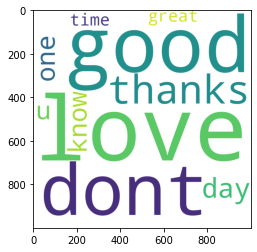

In [24]:
nube_palabras_tweet = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(tweet_count)
plt.imshow(nube_palabras_tweet)

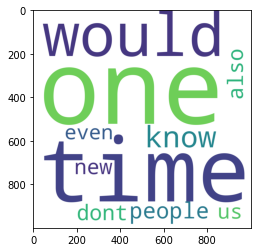

In [26]:
nube_palabras_blogs = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(blog_count)
plt.imshow(nube_palabras_blogs)

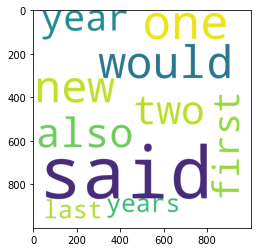

In [27]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(news_count)
plt.imshow(wc)

## Gráfica de barras de palabras

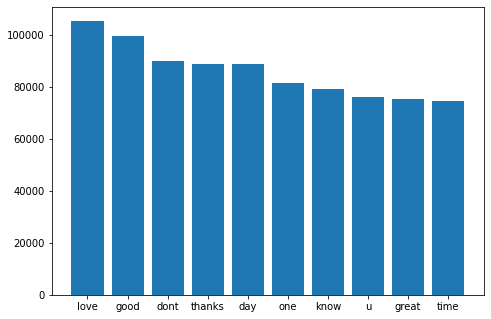

In [43]:
datos_tweet = tweet_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.show()

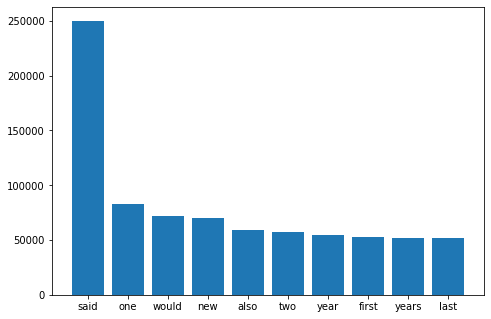

In [44]:
datos_news = news_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_news]
y_axis = [i[1] for i in datos_news]
ax.bar(x_axis,y_axis)
plt.show()

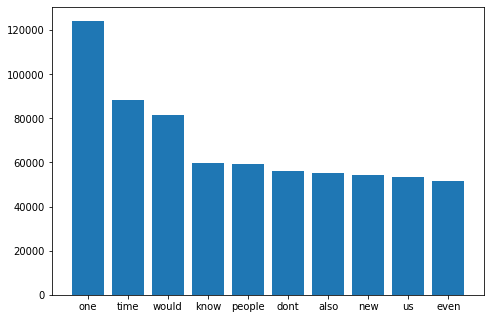

In [45]:
datos_blog = blog_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_blog]
y_axis = [i[1] for i in datos_blog]
ax.bar(x_axis,y_axis)
plt.show()

# N-Gramas


In [46]:
Todos = separacion_tweets+separacion_news+separacion_blogs

In [47]:
val=round(len(Todos)*0.1,0)
random_sample=random.sample(Todos,int(val))

In [48]:
warnings.filterwarnings('ignore')
two_gram=[]
size=2
for word in range(len(random_sample)):
    for item in ngrams(random_sample[word].split(),size):
        two_gram.append(item)

In [49]:
three_gram=[]
size=3
for word in range(len(random_sample)):
    for item in ngrams(random_sample[word].split(),size):
        three_gram.append(item)

In [50]:
model = defaultdict(lambda: defaultdict(lambda: 0))
for i,j,k in three_gram:
    model[(i,j)][k] +=1
for i,j in model:
    total=float(sum(model[(i,j)].values()))
    for k in model[(i,j)]:
        model[(i,j)][k] /= total